# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [166]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    # print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

File is readable


In [167]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [168]:
labels

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [169]:
df.shape

(50, 5)

In [170]:
df.replace(to_replace = 0.00, value = df.mean(axis=0, numeric_only=True), inplace=True)  # inject the mean of the column when value is 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [171]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [172]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [173]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [174]:
df_one = pd.get_dummies(df_sel["State"], dtype=int)

In [175]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [176]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


In [177]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [178]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [179]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [180]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [181]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [182]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [183]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)  


Train the Logistic Regression Model

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)

print(f'Accuracy = {accuracy}')

Accuracy = 0.2222


***Plot results***

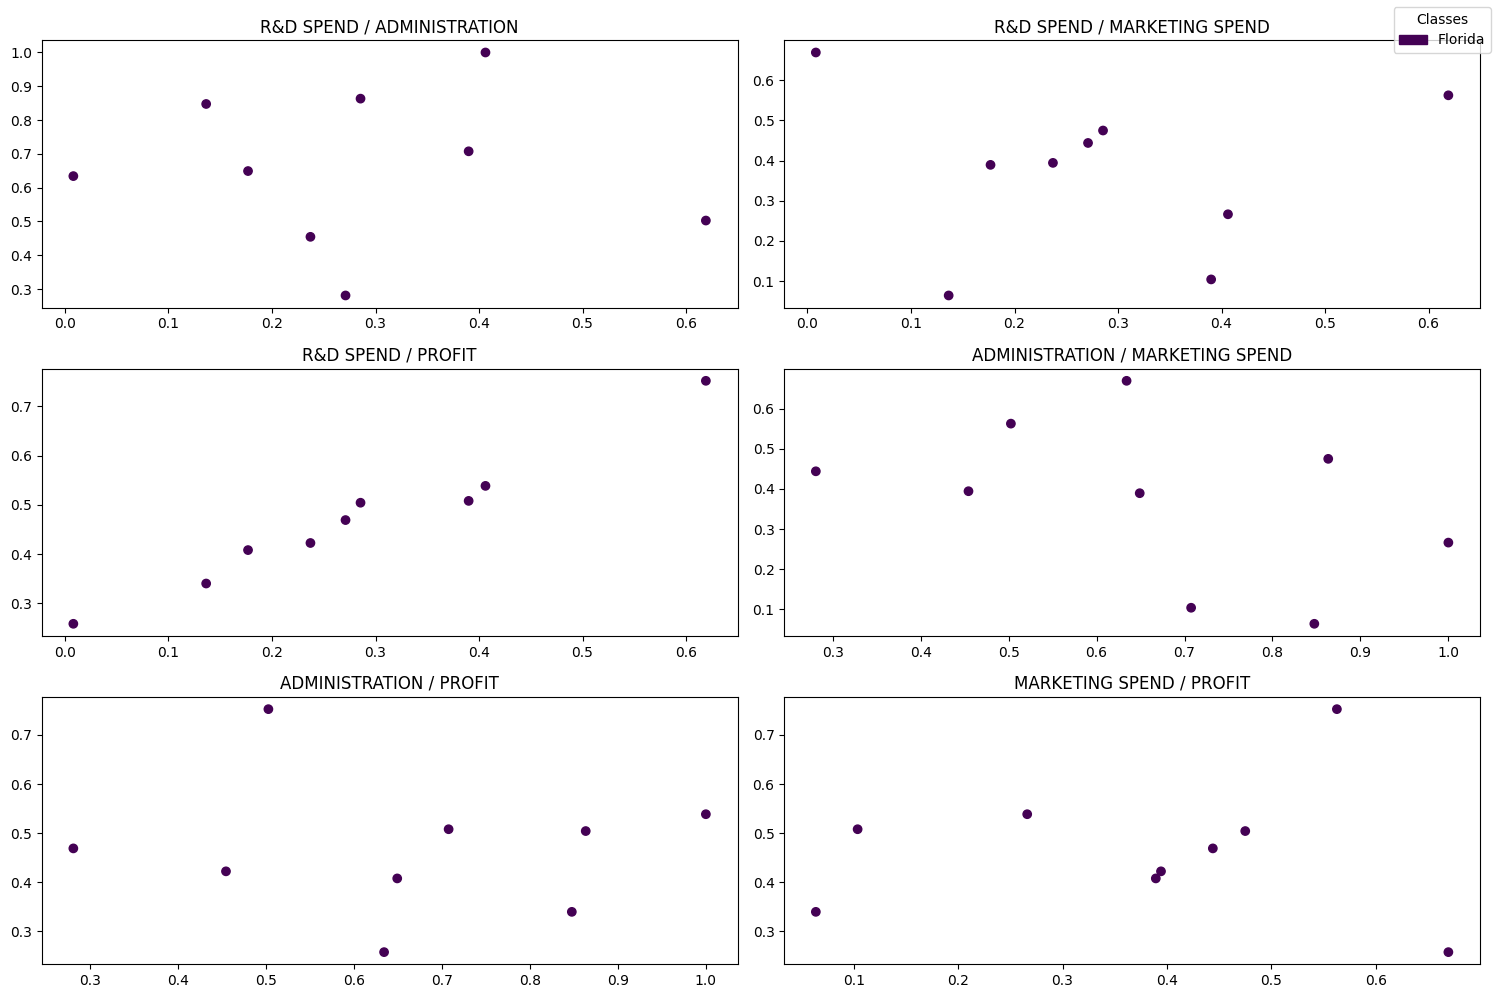

In [186]:
# Plot all features two by two to see if we can find some correlations visually; also divide the points with different colors according to the predicted label 

import matplotlib.patches as mpatches

classes = np.unique(predictions)
class_colors = {cls: color for cls, color in zip(classes, plt.cm.viridis(np.linspace(0, 1, len(classes))))}

fig, axs = plt.subplots(3,2,figsize=(15,10))
axs[0, 0].scatter(X_test[:,0], X_test[:,1], c=[class_colors[p] for p in predictions])
axs[0, 0].set_title('R&D SPEND / ADMINISTRATION')
axs[0, 1].scatter(X_test[:,0], X_test[:,2], c=[class_colors[p] for p in predictions])
axs[0, 1].set_title('R&D SPEND / MARKETING SPEND')
axs[1, 0].scatter(X_test[:,0], X_test[:,3], c=[class_colors[p] for p in predictions])
axs[1, 0].set_title('R&D SPEND / PROFIT')
axs[1, 1].scatter(X_test[:,1], X_test[:,2], c=[class_colors[p] for p in predictions])
axs[1, 1].set_title('ADMINISTRATION / MARKETING SPEND')
axs[2, 0].scatter(X_test[:,1], X_test[:,3], c=[class_colors[p] for p in predictions])
axs[2, 0].set_title('ADMINISTRATION / PROFIT')
axs[2, 1].scatter(X_test[:,2], X_test[:,3], c=[class_colors[p] for p in predictions])
axs[2, 1].set_title('MARKETING SPEND / PROFIT')

class_names = {
    0: 'Florida',
    1: 'California'
}

legend_handles = [mpatches.Patch(color=class_colors[cls], label=class_names[cls]) for cls in classes]
fig.legend(handles=legend_handles, loc='upper right', title='Classes')

plt.tight_layout()
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [187]:
import numpy.linalg as LA

def OLSGradient(X, y, w, points):
    return (-2/points)*((y-X@w)@X)

# Ridge regression (L2 regularization)

def RidgeSquareLoss(X, y, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L2 penalty term
    """
    return LA.norm(y-X@w,2) + lam*LA.norm(w,2)

def RidgeGradient(w, lam):
    return 2*lam*w

def GDRidge(X, y, iter, gamma, points, d, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    points : int
        Number of points in our dataset
    d : int
        Dimensionality of each data point in the dataset
    lam : float
        Weight of the L2 penalty term
    """
    W = np.zeros((d,iter))
    L = np.zeros(iter)
    w = np.zeros(d)
    for i in range(iter):
        W[:,i] = w
        w = w - gamma * (OLSGradient(X, y, w, points) + RidgeGradient(w, lam))
        L[i] = RidgeSquareLoss(X,y,w,lam)
    return W, L

In [188]:
# LASSO regression (L1 regularization)

def LassoSquareLoss(X, y, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L1 penalty term
    """
    return LA.norm(y-X@w,2) + lam*LA.norm(w,1)

def L1_subgradient(z):
    g = np.ones(z.shape)
    g[z < 0.] = -1.0
    return g

def LassoGradient(w, lam):
    return lam * L1_subgradient(w)

def GDLasso(X, y, iter, gamma, points, d, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    points : int
        Number of points in our dataset
    d : int
        Dimensionality of each data point in the dataset
    lam : float
        Weight of the L1 penalty term
    """
    W = np.zeros((d,iter))
    L = np.zeros(iter)
    w = np.random.normal(0, 0.1, d)
    for i in range(iter):
        W[:,i] = w
        w = w - gamma * (OLSGradient(X, y, w, points) + LassoGradient(w, lam))
        L[i] = LassoSquareLoss(X, y, w, lam)
    return W, L

In [189]:
#Elastic Net regularization

def GDElasticNet(X, y, iter, gamma, points, d, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    points : int
        Number of points in our dataset
    d : int
        Dimensionality of each data point in the dataset
    lam : float
        Weight of the penalty term
    """
    W = np.zeros((d,iter))
    L = np.zeros(iter)
    w = np.random.normal(0, 0.1, d)
    for i in range(iter):
        W[:,i] = w
        w = w - gamma * (OLSGradient(X, y, w, points) + LassoGradient(w, lam) + RidgeGradient(w, lam))
        L[i] = LassoSquareLoss(X, y, w, lam) + RidgeSquareLoss(X, y, w, lam)
    return W, L

In [190]:
# Use these regularized models on my data and see what happens

iter, gamma, points, d, lam = 100, 0.001, X.shape[0], X.shape[1], 0.3

W2, L2 = GDRidge(X, y, iter, gamma, points, d, lam)
W1, L1 = GDRidge(X, y, iter, gamma, points, d, lam)
Wel, Lel = GDRidge(X, y, iter, gamma, points, d, lam)

print(f'Parameters used: gamma = {gamma} , lambda = {lam}')
print(f'Ridge :\t\t Loss = {L2[-1]} ,\t weights = {W2[:,-1]}')
print(f'Lasso :\t\t Loss = {L2[-1]} ,\t weights = {W2[:,-1]}')
print(f'Elastic Net :\t Loss = {L2[-1]} ,\t weights = {W2[:,-1]}')

Parameters used: gamma = 0.001 , lambda = 0.3
Ridge :		 Loss = 3.770813253345026 ,	 weights = [0.03911979 0.05840061 0.0378736  0.04709071]
Lasso :		 Loss = 3.770813253345026 ,	 weights = [0.03911979 0.05840061 0.0378736  0.04709071]
Elastic Net :	 Loss = 3.770813253345026 ,	 weights = [0.03911979 0.05840061 0.0378736  0.04709071]


***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

              precision    recall  f1-score   support

     Florida       0.22      1.00      0.36         2
  California       0.00      0.00      0.00         7

    accuracy                           0.22         9
   macro avg       0.11      0.50      0.18         9
weighted avg       0.05      0.22      0.08         9



c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

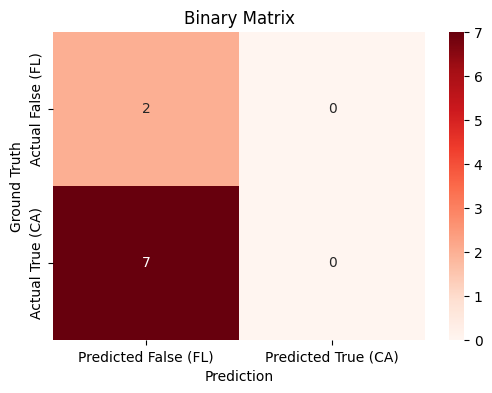

In [191]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['Florida', 'California']
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=True,
            xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'])
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.title("Binary Matrix")
plt.show()

Repeat the previous task for regularized logistic regression and compare the results.

In [192]:
def predict(X_new, w, threshold=0.5):
    """
    Parameters
    ----------
    X_new : array of shape (m, d)
        New data points where m is the number of new points and d is the dimensionality
    w : array of shape (d,)
        The final weight vector obtained after training
    threshold : float
        Decision threshold for binary classification. Defaults to 0.5
        
    Returns
    -------
    predictions : array of shape (m,)
        Predicted class labels (0 or 1) for each data point in X_new.
    """
    raw_predictions = 1/(1+(np.exp(-(X_new @ w))))
    predictions = (raw_predictions >= threshold).astype(int)
    return predictions

Ridge regularization:
              precision    recall  f1-score   support

     Florida       0.00      0.00      0.00         2
  California       0.78      1.00      0.88         7

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

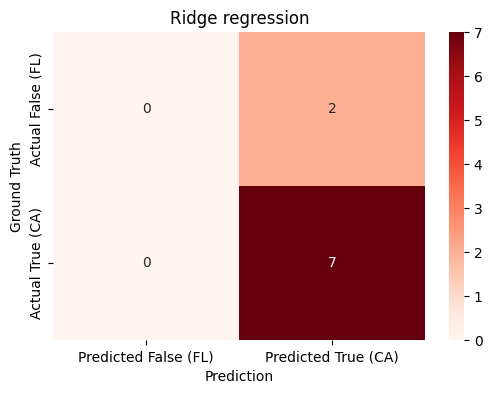

c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo



LASSO regularization:
              precision    recall  f1-score   support

     Florida       0.00      0.00      0.00         2
  California       0.78      1.00      0.88         7

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



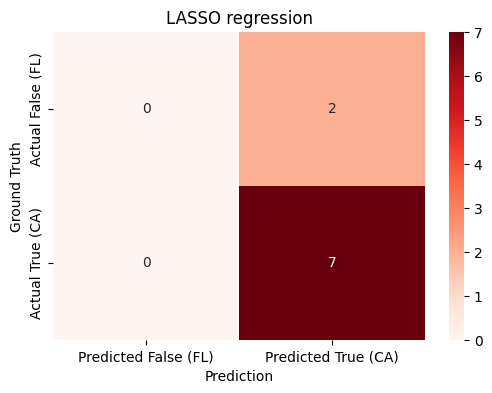



Elastic Net regularization:
              precision    recall  f1-score   support

     Florida       0.00      0.00      0.00         2
  California       0.78      1.00      0.88         7

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\test1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

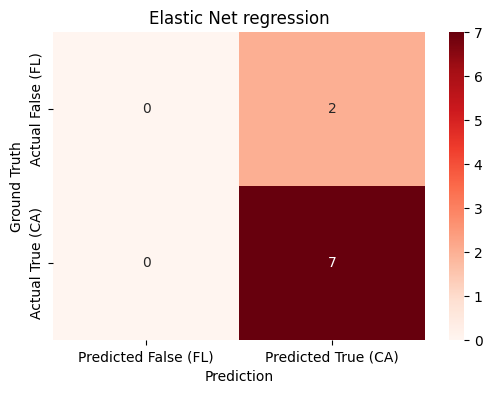

In [193]:
w2 = W2[:,-1]
w1 = W1[:,-1]
wel = Wel[:,-1]

treshold = 0.5

# Ridge
y_pred_r = [predict(x, w2, treshold) for x in X_test]
print('Ridge regularization:')
print(classification_report(y_true, y_pred_r, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_r)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=True,
            xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'])
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.title("Ridge regression")
plt.show()

# LASSO
y_pred_l = [predict(x, w1, treshold) for x in X_test]
print('\n\nLASSO regularization:')
print(classification_report(y_true, y_pred_l, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_l)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=True,
            xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'])
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.title("LASSO regression")
plt.show()

# Elastic net
y_pred_el = [predict(x, wel, treshold) for x in X_test]
print('\n\nElastic Net regularization:')
print(classification_report(y_true, y_pred_el, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_el)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=True,
            xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'])
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.title("Elastic Net regression")
plt.show()
# print(f'true labels = {y_true}\nelastic net = {y_pred_el}\nridge = {y_pred_r}\nlasso = {y_pred_l}')

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [ ]:
def ROC(X_test, y_test, w):
    """
    Parameters
    ----------
    X_test : array of shape (m, d)
        Test values to assign to a class
    y_test : array of shape (m,)
        True labels of predicted data
    w : array of shape (d,)
        Weight vector obltained after training
    """

    a = np.sort(1/(1+(np.exp(-(X_test @ w)))))   # Tresholds for ROC
    TPR = np.ones(len(a))                        # True positive rate
    FPR = np.ones(len(a))                        # False positive rate
    y_test = y_test.astype(int)                  # True labels

    from sklearn.metrics import confusion_matrix

    def compute_tpr_fpr(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tp/(tp + fn), fp/(fp + tn)
    
    for idx, elem in enumerate(a):
        y_pred = np.array([predict(x, w, elem) for x in X_test]).astype(int)

        TP = np.sum((y_pred == 1) & (y_test == 1))  # True positives
        FP = np.sum((y_pred == 1) & (y_test == 0))  # False positives
        FN = np.sum((y_pred == 0) & (y_test == 1))  # False negatives
        TN = np.sum((y_pred == 0) & (y_test == 0))  # True negatives

        TPR[idx] = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
        FPR[idx] = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate

        # TPR[idx] = sum(y_pred[y_test == 1]) / sum(y_test) if sum(y_test) > 0 else 0
        # FPR[idx] = sum(y_pred[(np.negative(y_test)+ np.ones(len(y_test))) == 1]) / sum(np.negative(y_test)+ np.ones(len(y_test))) if sum(np.negative(y_test)+ np.ones(len(y_test))) > 0 else 0
        
    print(f'FPR has {len(FPR)} elements: {FPR}\n TPR has {len(TPR)} elements: {TPR}')
    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(FPR,TPR, label="ROC Curve", color="blue")
    ax.plot([0, 1], [0, 1], 'r--', label="Random Classifier")
    ax.scatter(FPR, TPR, color = 'blue', label = "Observations")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve")
    ax.legend(loc="lower right")
    ax.grid(True)
    fig.show()

FPR has 9 elements: [1.  1.  1.  1.  0.5 0.5 0.5 0.5 0. ]
 TPR has 9 elements: [1.         0.85714286 0.71428571 0.57142857 0.57142857 0.42857143
 0.28571429 0.14285714 0.14285714]


C:\Users\test1\AppData\Local\Temp\ipykernel_4592\3503338589.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


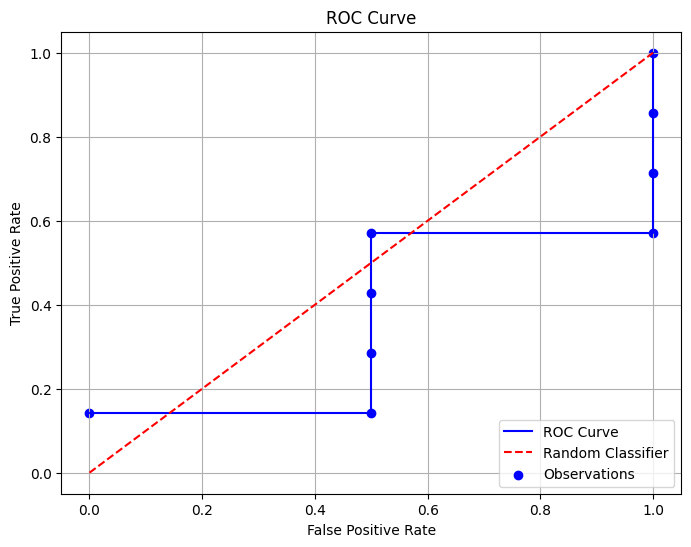

In [195]:
# ROC curve of model using elastic net
ROC(X_test, y_test, wel)